In [46]:
import anndata
import os

# Load the .h5ad file (replace with your filename)
input_file = os.path.join('data', 'normal','dataset.h5ad')
adata = anndata.read_h5ad(input_file)

# Basic info
print(adata)
print("Shape:", adata.shape)

# Show first few rows of observations and variables
print("Observations (obs):")
print(adata.obs.head())

print("Variables (var):")
print(adata.var.head())

# List available layers
print("Layers:", list(adata.layers.keys()))

# List obs and var columns
print("Obs columns:", adata.obs.columns.tolist())
print("Var columns:", adata.var.columns.tolist())

AnnData object with n_obs × n_vars = 2543 × 13046
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'size_factors'
    var: 'feature_id', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'feature_name'
    uns: 'dataset_description', 'dataset_id', 'dataset_name', 'dataset_organism', 'dataset_reference', 'dataset_summary', 'dataset_url', 'normalization_id', 'spatial'
    obsm: 'spatial'
    layers: 'counts', 'normalized'
Shape: (2543, 13046)
Observations (obs):
                    in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4660   
AAACAATCTACTAGCA-1          1          3         43         

In [47]:
# read  the uns layer

print("Unstructured data (uns):")
print(adata.uns.keys())


Unstructured data (uns):
dict_keys(['dataset_description', 'dataset_id', 'dataset_name', 'dataset_organism', 'dataset_reference', 'dataset_summary', 'dataset_url', 'normalization_id', 'spatial'])


In [48]:
# make normalized df
normalized = adata.layers['normalized']
# Convert to DataFrame for easier manipulation
import pandas as pd
normalized_df = pd.DataFrame(normalized.toarray(), index=adata.obs_names, columns=adata.var_names)
normalized_df.head()

gene_ids            ENSG00000187634  ENSG00000188976  ENSG00000187961  \
AAACAAGTATCTCCCA-1              0.0         1.146913              0.0   
AAACAATCTACTAGCA-1              0.0         0.000000              0.0   
AAACAGAGCGACTCCT-1              0.0         0.000000              0.0   
AAACAGCTTTCAGAAG-1              0.0         0.000000              0.0   
AAACCCGAACGAAATC-1              0.0         0.000000              0.0   

gene_ids            ENSG00000187583  ENSG00000188290  ENSG00000187608  \
AAACAAGTATCTCCCA-1              0.0         0.000000         0.000000   
AAACAATCTACTAGCA-1              0.0         0.000000         0.000000   
AAACAGAGCGACTCCT-1              0.0         1.929262         0.000000   
AAACAGCTTTCAGAAG-1              0.0         1.233806         0.594114   
AAACCCGAACGAAATC-1              0.0         0.000000         0.000000   

gene_ids            ENSG00000188157  ENSG00000131591  ENSG00000186827  \
AAACAAGTATCTCCCA-1          0.72959              0.0              0.0   
AAACAATCTACTAGCA-1          0.00000              0.0              0.0   
AAACAGAGCGACTCCT-1          0.00000              0.0              0.0   
AAACAGCTTTCAGAAG-1          0.00000              0.0              0.0   
AAACCCGAACGAAATC-1          0.00000              0.0              0.0   

gene_ids            ENSG00000078808  ...  ENSG00000155962  ENSG00000185973  \
AAACAAGTATCTCCCA-1         0.000000  ...         0.000000              0.0   
AAACAATCTACTAGCA-1         0.000000  ...         1.790927              0.0   
AAACAGAGCGACTCCT-1         0.777895  ...         0.777895              0.0   
AAACAGCTTTCAGAAG-1         1.769608  ...         0.000000              0.0   
AAACCCGAACGAAATC-1         1.943429  ...         0.000000              0.0   

gene_ids            ENSG00000168939  ENSG00000124333  ENSG00000067646  \
AAACAAGTATCTCCCA-1              0.0         0.000000         0.000000   
AAACAATCTACTAGCA-1              0.0         0.000000         0.000000   
AAACAGAGCGACTCCT-1              0.0         0.000000         0.000000   
AAACAGCTTTCAGAAG-1              0.0         0.964261         0.594114   
AAACCCGAACGAAATC-1              0.0         1.384123         0.000000   

gene_ids            ENSG00000092377  ENSG00000114374  ENSG00000067048  \
AAACAAGTATCTCCCA-1          0.72959              0.0         0.000000   
AAACAATCTACTAGCA-1          0.00000              0.0         0.000000   
AAACAGAGCGACTCCT-1          0.00000              0.0         0.000000   
AAACAGCTTTCAGAAG-1          0.00000              0.0         0.594114   
AAACCCGAACGAAATC-1          0.00000              0.0         0.000000   

gene_ids            ENSG00000154620  ENSG00000012817  
AAACAAGTATCTCCCA-1              0.0         0.729590  
AAACAATCTACTAGCA-1              0.0         0.000000  
AAACAGAGCGACTCCT-1              0.0         1.210086  
AAACAGCTTTCAGAAG-1              0.0         0.000000  
AAACCCGAACGAAATC-1              0.0         0.000000  

[5 rows x 13046 columns]

In [49]:
# sum of first 10 rows
print("Sum of first 10 rows in normalized data:")
print(normalized_df.head(10).sum(axis=1))

# sum of first 10 columns
print("Sum of first 10 columns in normalized data:")
print(normalized_df.iloc[:, :10].sum(axis=0))

Sum of first 10 rows in normalized data:
AAACAAGTATCTCCCA-1    4650.866211
AAACAATCTACTAGCA-1    2824.959473
AAACAGAGCGACTCCT-1    4739.333984
AAACAGCTTTCAGAAG-1    4580.555664
AAACCCGAACGAAATC-1    3384.144531
AAACCGGAAATGTTAA-1    3446.594971
AAACCGGGTAGGTACC-1    4214.728516
AAACGAGACGGTTGAT-1    3780.852295
AAACGTGTTCGCCCTA-1    3782.049561
AAACTAACGTGGCGAC-1    3726.690918
dtype: float32
Sum of first 10 columns in normalized data:
gene_ids
ENSG00000187634     274.587006
ENSG00000188976     605.136658
ENSG00000187961      75.209412
ENSG00000187583      61.061146
ENSG00000188290    1260.706665
ENSG00000187608     329.179138
ENSG00000188157     662.203674
ENSG00000131591     172.828140
ENSG00000186827      73.636536
ENSG00000078808    2979.622314
dtype: float32


In [50]:
adata.uns['spatial']

{'Visium_FFPE_Human_Normal_Prostate': {'images': {'hires': array([[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [252, 255, 252],
           [251, 255, 252],
           [251, 255, 252]],
   
          [[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [250, 254, 251],
           [251, 255, 252],
           [250, 254, 251]],
   
          [[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [250, 254, 251],
           [250, 254, 251],
           [250, 254, 251]],
   
          ...,
   
          [[254, 255, 253],
           [253, 255, 253],
           [253, 255, 253],
           ...,
           [253, 255, 253],
           [255, 255, 255],
           [254, 254, 254]],
   
          [[254, 254, 254],
           [254, 254, 254],
           [255, 255, 255],
           ...,
           [253, 255, 253],
           [255, 255, 255],
           [2

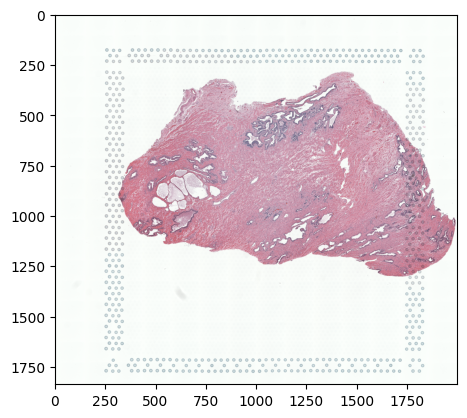

In [51]:
import matplotlib.pyplot as plt

matrices = adata.uns['spatial']['Visium_FFPE_Human_Normal_Prostate']['images']['hires']


plt.imshow(matrices)
plt.show()

In [52]:
# show counts layer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


counts = adata.layers['counts']

# Convert counts to a DataFrame for easier manipulation
counts_df = pd.DataFrame(counts.toarray(), index=adata.obs_names, columns=adata.var_names)
# Display the first few rows of the counts DataFrame
print("Counts DataFrame:")
counts_df.head()

Counts DataFrame:


gene_ids            ENSG00000187634  ENSG00000188976  ENSG00000187961  \
AAACAAGTATCTCCCA-1              0.0              2.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              0.0   
AAACCCGAACGAAATC-1              0.0              0.0              0.0   

gene_ids            ENSG00000187583  ENSG00000188290  ENSG00000187608  \
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              5.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              3.0              1.0   
AAACCCGAACGAAATC-1              0.0              0.0              0.0   

gene_ids            ENSG00000188157  ENSG00000131591  ENSG00000186827  \
AAACAAGTATCTCCCA-1              1.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              0.0   
AAACCCGAACGAAATC-1              0.0              0.0              0.0   

gene_ids            ENSG00000078808  ...  ENSG00000155962  ENSG00000185973  \
AAACAAGTATCTCCCA-1              0.0  ...              0.0              0.0   
AAACAATCTACTAGCA-1              0.0  ...              1.0              0.0   
AAACAGAGCGACTCCT-1              1.0  ...              1.0              0.0   
AAACAGCTTTCAGAAG-1              6.0  ...              0.0              0.0   
AAACCCGAACGAAATC-1              2.0  ...              0.0              0.0   

gene_ids            ENSG00000168939  ENSG00000124333  ENSG00000067646  \
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              2.0              1.0   
AAACCCGAACGAAATC-1              0.0              1.0              0.0   

gene_ids            ENSG00000092377  ENSG00000114374  ENSG00000067048  \
AAACAAGTATCTCCCA-1              1.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              1.0   
AAACCCGAACGAAATC-1              0.0              0.0              0.0   

gene_ids            ENSG00000154620  ENSG00000012817  
AAACAAGTATCTCCCA-1              0.0              1.0  
AAACAATCTACTAGCA-1              0.0              0.0  
AAACAGAGCGACTCCT-1              0.0              2.0  
AAACAGCTTTCAGAAG-1              0.0              0.0  
AAACCCGAACGAAATC-1              0.0              0.0  

[5 rows x 13046 columns]

In [53]:
counts_df.columns

Index(['ENSG00000187634', 'ENSG00000188976', 'ENSG00000187961',
       'ENSG00000187583', 'ENSG00000188290', 'ENSG00000187608',
       'ENSG00000188157', 'ENSG00000131591', 'ENSG00000186827',
       'ENSG00000078808',
       ...
       'ENSG00000155962', 'ENSG00000185973', 'ENSG00000168939',
       'ENSG00000124333', 'ENSG00000067646', 'ENSG00000092377',
       'ENSG00000114374', 'ENSG00000067048', 'ENSG00000154620',
       'ENSG00000012817'],
      dtype='object', name='gene_ids', length=13046)

In [54]:
# convert observations to a DataFrame
obs_df = adata.obs.copy()

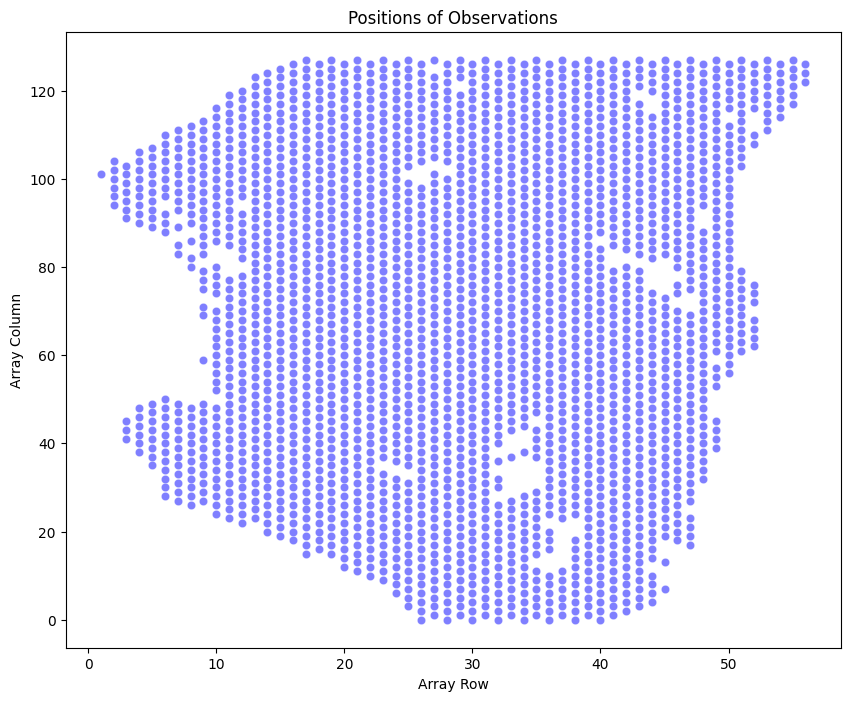

In [55]:
# plot positions of the experssions in observations using array_row and array_col in obs_df
plt.figure(figsize=(10, 8))
sns.scatterplot(data=obs_df, x='array_row', y='array_col', color='blue', alpha=0.5)
plt.title('Positions of Observations')
plt.xlabel('Array Row')
plt.ylabel('Array Column')
plt.show()


In [56]:
#Join the counts_df with obs_df
joined_df = obs_df.join(counts_df, how='inner')
# Display the first few rows of the joined DataFrame
print("Joined DataFrame:")
joined_df.head()

Joined DataFrame:


in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4660   
AAACAATCTACTAGCA-1          1          3         43               1461   
AAACAGAGCGACTCCT-1          1         14         94               4577   
AAACAGCTTTCAGAAG-1          1         43          9               5170   
AAACCCGAACGAAATC-1          1         45        115               2150   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.446985        9334.0            9.141526   
AAACAATCTACTAGCA-1                 7.287561        2010.0            7.606388   
AAACAGAGCGACTCCT-1                 8.429018        8524.0            9.050758   
AAACAGCTTTCAGAAG-1                 8.550821       12350.0            9.421493   
AAACCCGAACGAAATC-1                 7.673688        3350.0            8.117014   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   12.534819                    17.323763   
AAACAATCTACTAGCA-1                   17.611940                    24.378109   
AAACAGAGCGACTCCT-1                    9.713749                    14.629282   
AAACAGCTTTCAGAAG-1                   18.267206                    22.623482   
AAACCCGAACGAAATC-1                   18.268657                    24.149254   

                    pct_counts_in_top_200_genes  ...  ENSG00000155962  \
AAACAAGTATCTCCCA-1                    24.501821  ...              0.0   
AAACAATCTACTAGCA-1                    34.328358  ...              1.0   
AAACAGAGCGACTCCT-1                    21.363210  ...              1.0   
AAACAGCTTTCAGAAG-1                    28.947368  ...              0.0   
AAACCCGAACGAAATC-1                    32.447761  ...              0.0   

                    ENSG00000185973  ENSG00000168939  ENSG00000124333  \
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              2.0   
AAACCCGAACGAAATC-1              0.0              0.0              1.0   

                    ENSG00000067646  ENSG00000092377  ENSG00000114374  \
AAACAAGTATCTCCCA-1              0.0              1.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              1.0              0.0              0.0   
AAACCCGAACGAAATC-1              0.0              0.0              0.0   

                    ENSG00000067048  ENSG00000154620  ENSG00000012817  
AAACAAGTATCTCCCA-1              0.0              0.0              1.0  
AAACAATCTACTAGCA-1              0.0              0.0              0.0  
AAACAGAGCGACTCCT-1              0.0              0.0              2.0  
AAACAGCTTTCAGAAG-1              1.0              0.0              0.0  
AAACCCGAACGAAATC-1              0.0              0.0              0.0  

[5 rows x 13059 columns]

In [57]:
# create data frame from the counts_df where the value is the column name of the highest value in teh row
max_counts_df = counts_df.idxmax(axis=1)
# Display the first few rows of the max_counts DataFrame
print("Max Counts DataFrame:")
type(max_counts_df)
#convert to a DataFrame
max_counts_df = pd.DataFrame(max_counts_df, columns=['max_gene'])
max_counts_df.head()

Max Counts DataFrame:


max_gene
AAACAAGTATCTCCCA-1  ENSG00000142515
AAACAATCTACTAGCA-1  ENSG00000150991
AAACAGAGCGACTCCT-1  ENSG00000150991
AAACAGCTTTCAGAAG-1  ENSG00000263639
AAACCCGAACGAAATC-1  ENSG00000211673

In [58]:
#join the max_counts_df with obs_df
joined_max_counts_df = obs_df.join(max_counts_df, how='inner')
# Display the first few rows of the joined DataFrame
print("Joined Max Counts DataFrame:")
joined_max_counts_df.head()

Joined Max Counts DataFrame:


in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4660   
AAACAATCTACTAGCA-1          1          3         43               1461   
AAACAGAGCGACTCCT-1          1         14         94               4577   
AAACAGCTTTCAGAAG-1          1         43          9               5170   
AAACCCGAACGAAATC-1          1         45        115               2150   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.446985        9334.0            9.141526   
AAACAATCTACTAGCA-1                 7.287561        2010.0            7.606388   
AAACAGAGCGACTCCT-1                 8.429018        8524.0            9.050758   
AAACAGCTTTCAGAAG-1                 8.550821       12350.0            9.421493   
AAACCCGAACGAAATC-1                 7.673688        3350.0            8.117014   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   12.534819                    17.323763   
AAACAATCTACTAGCA-1                   17.611940                    24.378109   
AAACAGAGCGACTCCT-1                    9.713749                    14.629282   
AAACAGCTTTCAGAAG-1                   18.267206                    22.623482   
AAACCCGAACGAAATC-1                   18.268657                    24.149254   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    24.501821                    37.700879   
AAACAATCTACTAGCA-1                    34.328358                    52.189055   
AAACAGAGCGACTCCT-1                    21.363210                    34.795870   
AAACAGCTTTCAGAAG-1                    28.947368                    41.214575   
AAACCCGAACGAAATC-1                    32.447761                    50.358209   

                    n_genes  size_factors         max_gene  
AAACAAGTATCTCCCA-1     4660        9309.0  ENSG00000142515  
AAACAATCTACTAGCA-1     1461        2002.0  ENSG00000150991  
AAACAGAGCGACTCCT-1     4577        8497.0  ENSG00000150991  
AAACAGCTTTCAGAAG-1     5170       12324.0  ENSG00000263639  
AAACCCGAACGAAATC-1     2150        3343.0  ENSG00000211673

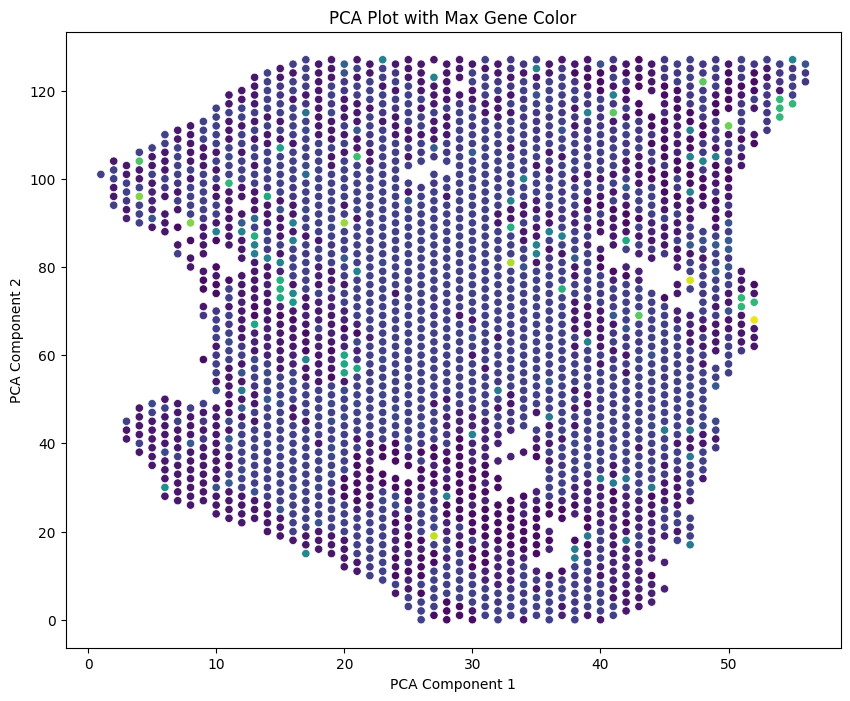

In [59]:
# plot chart with x as array_row, y as array_col and color as max_gene
plt.figure(figsize=(10, 8))
sns.scatterplot(data=joined_max_counts_df, x='array_row', y='array_col', hue='max_gene', palette='viridis', legend=None)
plt.title('PCA Plot with Max Gene Color')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

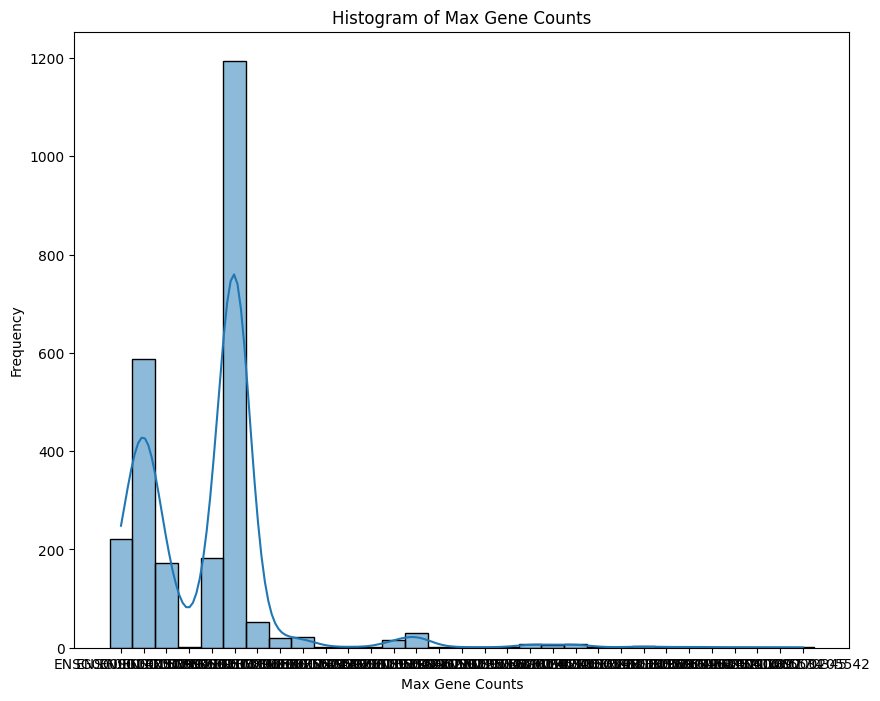

In [60]:
# histogram of the max gene counts
plt.figure(figsize=(10, 8))
sns.histplot(data=joined_max_counts_df, x='max_gene', bins=30, kde=True)
plt.title('Histogram of Max Gene Counts')
plt.xlabel('Max Gene Counts')
plt.ylabel('Frequency')
plt.show()


In [61]:
# find the top 10 genes with the highest counts
top_genes = counts_df.sum(axis=0).nlargest(10)
# Display the top 10 genes
print("Top 10 Genes with Highest Counts:")
print(top_genes)

Top 10 Genes with Highest Counts:
gene_ids
ENSG00000101335    122707.0
ENSG00000150991    112500.0
ENSG00000107796     92484.0
ENSG00000142515     80319.0
ENSG00000075624     79780.0
ENSG00000163017     78279.0
ENSG00000149591     76910.0
ENSG00000263639     76814.0
ENSG00000196924     64757.0
ENSG00000198467     58705.0
dtype: float32


In [62]:
# find the names of the top 10 genes
top_genes_names = top_genes.index.tolist()
# Display the names of the top 10 genes
print("Top 10 Genes Names:")
print(top_genes_names)

Top 10 Genes Names:
['ENSG00000101335', 'ENSG00000150991', 'ENSG00000107796', 'ENSG00000142515', 'ENSG00000075624', 'ENSG00000163017', 'ENSG00000149591', 'ENSG00000263639', 'ENSG00000196924', 'ENSG00000198467']


In [63]:
# make a big df of all the data
all_data_df = joined_df.copy()

# drop columns n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_genes,size_factors
all_data_df.drop(columns=['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
                        'log1p_total_counts', 'pct_counts_in_top_50_genes',
                        'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
                        'pct_counts_in_top_500_genes', 'n_genes', 'size_factors'], inplace=True)

all_data_df.head()

in_tissue  array_row  array_col  ENSG00000187634  \
AAACAAGTATCTCCCA-1          1         50        102              0.0   
AAACAATCTACTAGCA-1          1          3         43              0.0   
AAACAGAGCGACTCCT-1          1         14         94              0.0   
AAACAGCTTTCAGAAG-1          1         43          9              0.0   
AAACCCGAACGAAATC-1          1         45        115              0.0   

                    ENSG00000188976  ENSG00000187961  ENSG00000187583  \
AAACAAGTATCTCCCA-1              2.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              0.0   
AAACCCGAACGAAATC-1              0.0              0.0              0.0   

                    ENSG00000188290  ENSG00000187608  ENSG00000188157  ...  \
AAACAAGTATCTCCCA-1              0.0              0.0              1.0  ...   
AAACAATCTACTAGCA-1              0.0              0.0              0.0  ...   
AAACAGAGCGACTCCT-1              5.0              0.0              0.0  ...   
AAACAGCTTTCAGAAG-1              3.0              1.0              0.0  ...   
AAACCCGAACGAAATC-1              0.0              0.0              0.0  ...   

                    ENSG00000155962  ENSG00000185973  ENSG00000168939  \
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              1.0              0.0              0.0   
AAACAGAGCGACTCCT-1              1.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              0.0   
AAACCCGAACGAAATC-1              0.0              0.0              0.0   

                    ENSG00000124333  ENSG00000067646  ENSG00000092377  \
AAACAAGTATCTCCCA-1              0.0              0.0              1.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              2.0              1.0              0.0   
AAACCCGAACGAAATC-1              1.0              0.0              0.0   

                    ENSG00000114374  ENSG00000067048  ENSG00000154620  \
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              1.0              0.0   
AAACCCGAACGAAATC-1              0.0              0.0              0.0   

                    ENSG00000012817  
AAACAAGTATCTCCCA-1              1.0  
AAACAATCTACTAGCA-1              0.0  
AAACAGAGCGACTCCT-1              2.0  
AAACAGCTTTCAGAAG-1              0.0  
AAACCCGAACGAAATC-1              0.0  

[5 rows x 13049 columns]

In [64]:
transformed_data_df = all_data_df.copy().drop(columns=["in_tissue"])

# create mapping of gene names to a z coordinate
gene_z_mapping = {gene: idx for idx, gene in enumerate(counts_df.columns)}

# create new df where each count is in its own cell with columns: array_row, array_col, gene, count
melted_df = transformed_data_df.melt(id_vars=['array_row', 'array_col'],
                                       var_name='gene', value_name='count')
#display the first few rows of the melted DataFrame
melted_df.head()

array_row  array_col             gene  count
0         50        102  ENSG00000187634    0.0
1          3         43  ENSG00000187634    0.0
2         14         94  ENSG00000187634    0.0
3         43          9  ENSG00000187634    0.0
4         45        115  ENSG00000187634    0.0

In [65]:
gene_z_mapping

{'ENSG00000187634': 0,
 'ENSG00000188976': 1,
 'ENSG00000187961': 2,
 'ENSG00000187583': 3,
 'ENSG00000188290': 4,
 'ENSG00000187608': 5,
 'ENSG00000188157': 6,
 'ENSG00000131591': 7,
 'ENSG00000186827': 8,
 'ENSG00000078808': 9,
 'ENSG00000176022': 10,
 'ENSG00000160087': 11,
 'ENSG00000162572': 12,
 'ENSG00000131584': 13,
 'ENSG00000169972': 14,
 'ENSG00000127054': 15,
 'ENSG00000224051': 16,
 'ENSG00000107404': 17,
 'ENSG00000162576': 18,
 'ENSG00000175756': 19,
 'ENSG00000221978': 20,
 'ENSG00000235098': 21,
 'ENSG00000179403': 22,
 'ENSG00000215915': 23,
 'ENSG00000205090': 24,
 'ENSG00000160075': 25,
 'ENSG00000197530': 26,
 'ENSG00000189409': 27,
 'ENSG00000248333': 28,
 'ENSG00000189339': 29,
 'ENSG00000215790': 30,
 'ENSG00000008130': 31,
 'ENSG00000078369': 32,
 'ENSG00000169885': 33,
 'ENSG00000067606': 34,
 'ENSG00000162585': 35,
 'ENSG00000157933': 36,
 'ENSG00000116151': 37,
 'ENSG00000157916': 38,
 'ENSG00000157911': 39,
 'ENSG00000149527': 40,
 'ENSG00000157881': 41,
 '

In [66]:
#map the gene names to z coordinates
melted_df['z'] = melted_df['gene'].map(gene_z_mapping)
# Display the first few rows of the melted DataFrame with z coordinates
melted_df.head()
len(melted_df['z'])

33175978

In [67]:
# plot 3d scatter plot of the data only for counts greater than 0
import plotly.graph_objects as go
import plotly.express as px

# grab some random poitnts to visualize
import random

# Filter the melted DataFrame for counts greater than 0
filtered_melted_df = melted_df[melted_df['count'] > 2]

# Randomly sample 100000 points for visualization but keep the points where gene = ENSG00000142515
filtered_melted_df = pd.concat([(filtered_melted_df[filtered_melted_df['gene'] == 'ENSG00000142515']),
    filtered_melted_df[filtered_melted_df['gene'] != 'ENSG00000142515'].sample(n=min(10000, len(filtered_melted_df)), random_state=42)])

# sampled_indices = random.sample(range(len(filtered_melted_df)), min(100000, len(filtered_melted_df)))
# filtered_melted_df = filtered_melted_df.iloc[sampled_indices]

# add number id to the DataFrame with count of 1 as id 1, 2-5 as id 2, 6-40 as id 3,  40+ as id 4
filtered_melted_df['id'] = pd.cut(filtered_melted_df['count'],
                                  bins=[0, 1, 5, 40, float('inf')],
                                  labels=[4, 3, 2, 1],
                                  right=False)


# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=filtered_melted_df['array_row'],
    y=filtered_melted_df['array_col'],
    z=filtered_melted_df['z'],
    mode='markers',
    marker=dict(
        size=2,
        color=filtered_melted_df['id'],  # Color by count
        opacity=0.8
    ),
    text=filtered_melted_df['count']  # Hover text
)])
fig.update_layout(
    title='3D Scatter Plot of Gene Counts',
    scene=dict(
        xaxis_title='Array Row',
        yaxis_title='Array Column',
        zaxis_title='Gene (Z Coordinate)'
    ),
    width=800,
    height=800
)
fig.show()


In [68]:
# plot 3d scatter plot of the data only for counts greater than 0
import plotly.graph_objects as go
import plotly.express as px

# grab some random poitnts to visualize
import random

# Filter the melted DataFrame for counts greater than 0
filtered_melted_df = melted_df[melted_df['count'] > 0]

# Randomly sample 10 layers (z coordinates) for visualization
sampled_z = random.sample(list(filtered_melted_df['z'].unique()), min(50, len(filtered_melted_df['z'].unique())))
filtered_melted_df = filtered_melted_df[filtered_melted_df['z'].isin(sampled_z)]


# add number id to the DataFrame with count of 1 as id 1, 2-5 as id 2, 6-40 as id 3,  40+ as id 4
filtered_melted_df['id'] = pd.cut(filtered_melted_df['count'],
                                  bins=[0, 1, 5, 40, float('inf')],
                                  labels=[4, 3, 2, 1],
                                  right=False)

# add new column for marker with form count, gene
filtered_melted_df['marker'] = filtered_melted_df['count'].astype(str) + ', ' + filtered_melted_df['gene']


# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=filtered_melted_df['array_row'],
    y=filtered_melted_df['array_col'],
    z=filtered_melted_df['z'],
    mode='markers',
    marker=dict(
        size=2,
        color=filtered_melted_df['id'],  # Color by count
        opacity=0.8
    ),
    text= (filtered_melted_df['marker'])  # Hover text
)])
fig.update_layout(
    title='3D Scatter Plot of Gene Counts',
    scene=dict(
        xaxis_title='Array Row',
        yaxis_title='Array Column',
        zaxis_title='Gene (Z Coordinate)'
    ),
    width=800,
    height=800
)
fig.show()


In [69]:
# find different numbers in counts
unique_counts = filtered_melted_df['count'].unique()
len(unique_counts)

14

In [70]:
# work with all_data_df
# change index name to 'id'
all_data_df.reset_index(inplace=True)
all_data_df.rename(columns={'index': 'id'}, inplace=True)

In [71]:
# set index to id, in_tissue, array_row, array_col
all_data_df.set_index(['id', 'in_tissue', 'array_row', 'array_col'], inplace=True)
all_data_df

ENSG00000187634  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    0.0   
AAACAATCTACTAGCA-1 1         3         43                     0.0   
AAACAGAGCGACTCCT-1 1         14        94                     0.0   
AAACAGCTTTCAGAAG-1 1         43        9                      0.0   
AAACCCGAACGAAATC-1 1         45        115                    0.0   
...                                                           ...   
TTGTGGTATAGGTATG-1 1         24        126                    0.0   
TTGTTAGCAAATTCGA-1 1         22        42                     0.0   
TTGTTCAGTGTGCTAC-1 1         24        64                     0.0   
TTGTTGTGTGTCAAGA-1 1         31        77                     0.0   
TTGTTTCCATACAACT-1 1         45        27                     1.0   

                                                  ENSG00000188976  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    2.0   
AAACAATCTACTAGCA-1 1         3         43                     0.0   
AAACAGAGCGACTCCT-1 1         14        94                     0.0   
AAACAGCTTTCAGAAG-1 1         43        9                      0.0   
AAACCCGAACGAAATC-1 1         45        115                    0.0   
...                                                           ...   
TTGTGGTATAGGTATG-1 1         24        126                    1.0   
TTGTTAGCAAATTCGA-1 1         22        42                     0.0   
TTGTTCAGTGTGCTAC-1 1         24        64                     0.0   
TTGTTGTGTGTCAAGA-1 1         31        77                     1.0   
TTGTTTCCATACAACT-1 1         45        27                     0.0   

                                                  ENSG00000187961  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    0.0   
AAACAATCTACTAGCA-1 1         3         43                     0.0   
AAACAGAGCGACTCCT-1 1         14        94                     0.0   
AAACAGCTTTCAGAAG-1 1         43        9                      0.0   
AAACCCGAACGAAATC-1 1         45        115                    0.0   
...                                                           ...   
TTGTGGTATAGGTATG-1 1         24        126                    0.0   
TTGTTAGCAAATTCGA-1 1         22        42                     0.0   
TTGTTCAGTGTGCTAC-1 1         24        64                     0.0   
TTGTTGTGTGTCAAGA-1 1         31        77                     0.0   
TTGTTTCCATACAACT-1 1         45        27                     0.0   

                                                  ENSG00000187583  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    0.0   
AAACAATCTACTAGCA-1 1         3         43                     0.0   
AAACAGAGCGACTCCT-1 1         14        94                     0.0   
AAACAGCTTTCAGAAG-1 1         43        9                      0.0   
AAACCCGAACGAAATC-1 1         45        115                    0.0   
...                                                           ...   
TTGTGGTATAGGTATG-1 1         24        126                    0.0   
TTGTTAGCAAATTCGA-1 1         22        42                     0.0   
TTGTTCAGTGTGCTAC-1 1         24        64                     0.0   
TTGTTGTGTGTCAAGA-1 1         31        77                     0.0   
TTGTTTCCATACAACT-1 1         45        27                     0.0   

                                                  ENSG00000188290  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    0.0   
AAACAATCTACTAGCA-1 1         3         43                     0.0   
AAACAGAGCGACTCCT-1 1         14        94                     5.0   
AAACAGCTTTCAGAAG-1 1         43        9                      3.0   
AAACCCGAACGAAATC-1 1         45        115  

In [72]:
# find top 100 genes with greatest variance
top_variance_genes = all_data_df.var().nlargest(100)
# Display the top 100 genes with greatest variance
print("Top 100 Genes with Greatest Variance:")
print(top_variance_genes)

Top 100 Genes with Greatest Variance:
ENSG00000263639    5269.551758
ENSG00000142515    4517.299805
ENSG00000211592    1521.302734
ENSG00000014257    1459.662964
ENSG00000167751     689.573853
                      ...     
ENSG00000110651      11.998194
ENSG00000067113      11.917118
ENSG00000152583      11.870667
ENSG00000103196      11.784439
ENSG00000109472      11.574549
Length: 100, dtype: float32


In [73]:
# create a new DataFrame with only the top 100 genes
top_variance_genes_df = all_data_df[top_variance_genes.index]
# Display the first few rows of the top variance genes DataFrame
top_variance_genes_df

ENSG00000263639  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                   46.0   
AAACAATCTACTAGCA-1 1         3         43                    11.0   
AAACAGAGCGACTCCT-1 1         14        94                     4.0   
AAACAGCTTTCAGAAG-1 1         43        9                    677.0   
AAACCCGAACGAAATC-1 1         45        115                   14.0   
...                                                           ...   
TTGTGGTATAGGTATG-1 1         24        126                    2.0   
TTGTTAGCAAATTCGA-1 1         22        42                     4.0   
TTGTTCAGTGTGCTAC-1 1         24        64                    20.0   
TTGTTGTGTGTCAAGA-1 1         31        77                    15.0   
TTGTTTCCATACAACT-1 1         45        27                    50.0   

                                                  ENSG00000142515  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                  151.0   
AAACAATCTACTAGCA-1 1         3         43                    12.0   
AAACAGAGCGACTCCT-1 1         14        94                     2.0   
AAACAGCTTTCAGAAG-1 1         43        9                    256.0   
AAACCCGAACGAAATC-1 1         45        115                   37.0   
...                                                           ...   
TTGTGGTATAGGTATG-1 1         24        126                   10.0   
TTGTTAGCAAATTCGA-1 1         22        42                     4.0   
TTGTTCAGTGTGCTAC-1 1         24        64                    12.0   
TTGTTGTGTGTCAAGA-1 1         31        77                     5.0   
TTGTTTCCATACAACT-1 1         45        27                    49.0   

                                                  ENSG00000211592  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                   36.0   
AAACAATCTACTAGCA-1 1         3         43                     5.0   
AAACAGAGCGACTCCT-1 1         14        94                     4.0   
AAACAGCTTTCAGAAG-1 1         43        9                      6.0   
AAACCCGAACGAAATC-1 1         45        115                   31.0   
...                                                           ...   
TTGTGGTATAGGTATG-1 1         24        126                   30.0   
TTGTTAGCAAATTCGA-1 1         22        42                     0.0   
TTGTTCAGTGTGCTAC-1 1         24        64                     2.0   
TTGTTGTGTGTCAAGA-1 1         31        77                     3.0   
TTGTTTCCATACAACT-1 1         45        27                     6.0   

                                                  ENSG00000014257  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                   55.0   
AAACAATCTACTAGCA-1 1         3         43                     7.0   
AAACAGAGCGACTCCT-1 1         14        94                     2.0   
AAACAGCTTTCAGAAG-1 1         43        9                    217.0   
AAACCCGAACGAAATC-1 1         45        115                   19.0   
...                                                           ...   
TTGTGGTATAGGTATG-1 1         24        126                    4.0   
TTGTTAGCAAATTCGA-1 1         22        42                     2.0   
TTGTTCAGTGTGCTAC-1 1         24        64                     3.0   
TTGTTGTGTGTCAAGA-1 1         31        77                     2.0   
TTGTTTCCATACAACT-1 1         45        27                    21.0   

                                                  ENSG00000167751  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                   76.0   
AAACAATCTACTAGCA-1 1         3         43                     1.0   
AAACAGAGCGACTCCT-1 1         14        94                     0.0   
AAACAGCTTTCAGAAG-1 1         43        9                    110.0   
AAACCCGAACGAAATC-1 1         45        115  

In [74]:
# map each value to 1 or 0 based on greater than 1
top_variance_genes_df_bin = top_variance_genes_df.map(lambda x: 1 if x > 5 else 0)
top_variance_genes_df_bin

ENSG00000263639  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                      1   
AAACAATCTACTAGCA-1 1         3         43                       1   
AAACAGAGCGACTCCT-1 1         14        94                       0   
AAACAGCTTTCAGAAG-1 1         43        9                        1   
AAACCCGAACGAAATC-1 1         45        115                      1   
...                                                           ...   
TTGTGGTATAGGTATG-1 1         24        126                      0   
TTGTTAGCAAATTCGA-1 1         22        42                       0   
TTGTTCAGTGTGCTAC-1 1         24        64                       1   
TTGTTGTGTGTCAAGA-1 1         31        77                       1   
TTGTTTCCATACAACT-1 1         45        27                       1   

                                                  ENSG00000142515  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                      1   
AAACAATCTACTAGCA-1 1         3         43                       1   
AAACAGAGCGACTCCT-1 1         14        94                       0   
AAACAGCTTTCAGAAG-1 1         43        9                        1   
AAACCCGAACGAAATC-1 1         45        115                      1   
...                                                           ...   
TTGTGGTATAGGTATG-1 1         24        126                      1   
TTGTTAGCAAATTCGA-1 1         22        42                       0   
TTGTTCAGTGTGCTAC-1 1         24        64                       1   
TTGTTGTGTGTCAAGA-1 1         31        77                       0   
TTGTTTCCATACAACT-1 1         45        27                       1   

                                                  ENSG00000211592  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                      1   
AAACAATCTACTAGCA-1 1         3         43                       0   
AAACAGAGCGACTCCT-1 1         14        94                       0   
AAACAGCTTTCAGAAG-1 1         43        9                        1   
AAACCCGAACGAAATC-1 1         45        115                      1   
...                                                           ...   
TTGTGGTATAGGTATG-1 1         24        126                      1   
TTGTTAGCAAATTCGA-1 1         22        42                       0   
TTGTTCAGTGTGCTAC-1 1         24        64                       0   
TTGTTGTGTGTCAAGA-1 1         31        77                       0   
TTGTTTCCATACAACT-1 1         45        27                       1   

                                                  ENSG00000014257  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                      1   
AAACAATCTACTAGCA-1 1         3         43                       1   
AAACAGAGCGACTCCT-1 1         14        94                       0   
AAACAGCTTTCAGAAG-1 1         43        9                        1   
AAACCCGAACGAAATC-1 1         45        115                      1   
...                                                           ...   
TTGTGGTATAGGTATG-1 1         24        126                      0   
TTGTTAGCAAATTCGA-1 1         22        42                       0   
TTGTTCAGTGTGCTAC-1 1         24        64                       0   
TTGTTGTGTGTCAAGA-1 1         31        77                       0   
TTGTTTCCATACAACT-1 1         45        27                       1   

                                                  ENSG00000167751  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                      1   
AAACAATCTACTAGCA-1 1         3         43                       0   
AAACAGAGCGACTCCT-1 1         14        94                       0   
AAACAGCTTTCAGAAG-1 1         43        9                        1   
AAACCCGAACGAAATC-1 1         45        115  

In [75]:
# count number of 0s and 1s in all data
count_0s = (top_variance_genes_df_bin == 0).sum().sum()
count_1s = (top_variance_genes_df_bin == 1).sum().sum()

print(f"Count of 0s: {count_0s}, Count of 1s: {count_1s}")

Count of 0s: 142490, Count of 1s: 111810


In [76]:
# convert the DataFrame to a array
top_variance_genes_array = top_variance_genes_df.values
top_variance_genes_array

array([[ 46., 151.,  36., ...,   8.,   6.,   9.],
       [ 11.,  12.,   5., ...,   0.,   3.,   1.],
       [  4.,   2.,   4., ...,   6.,   0.,   1.],
       ...,
       [ 20.,  12.,   2., ...,   4.,   5.,   0.],
       [ 15.,   5.,   3., ...,   5.,   2.,   1.],
       [ 50.,  49.,   6., ...,   5.,   2.,   2.]], dtype=float32)

In [77]:
# put x and y coordinates in a array
xy_coords_df = all_data_df.reset_index()[['array_row', 'array_col']]
xy_coords_array = xy_coords_df.values
xy_coords_array

array([[ 50, 102],
       [  3,  43],
       [ 14,  94],
       ...,
       [ 24,  64],
       [ 31,  77],
       [ 45,  27]])

Points type: <class 'numpy.ndarray'>
Gene expression type: <class 'numpy.ndarray'>


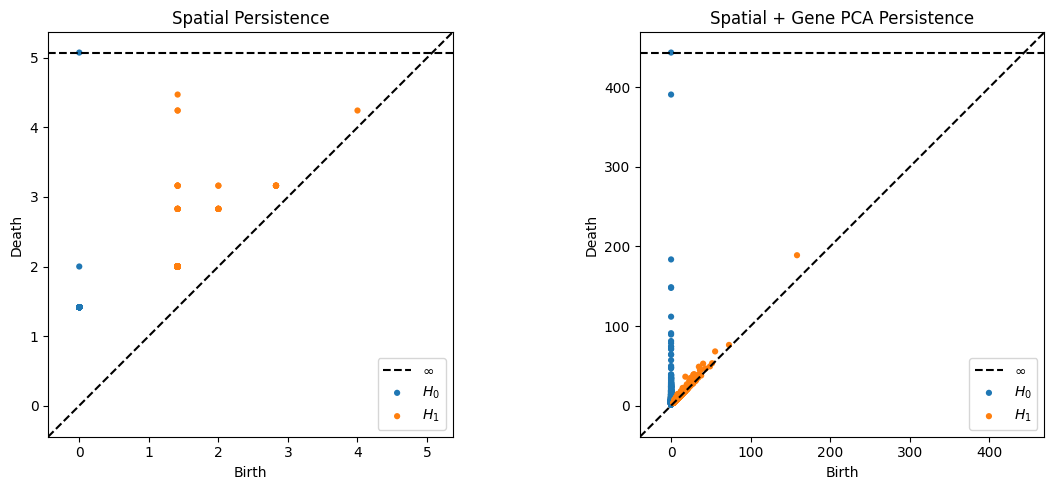

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from sklearn.decomposition import PCA

points = xy_coords_array
gene_expr = top_variance_genes_array

spatial_coords = points

# print types
print("Points type:", type(points))
print("Gene expression type:", type(gene_expr))


# spatial_coords = np.concatenate(points, axis=0)
# gene_expr = np.concatenate(gene_expr, axis=0)

# Step 2: PCA on gene expression
pca = PCA(n_components=2)
gene_pca = pca.fit_transform(gene_expr)

# Step 3: Combine spatial and gene PCA data
combined_data = np.hstack([spatial_coords, gene_pca])

# Step 4: Persistent homology
result_spatial = ripser(spatial_coords)
result_combined = ripser(combined_data)

# Step 5: Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title("Spatial Persistence")
plot_diagrams(result_spatial["dgms"], show=False, ax=axs[0])

axs[1].set_title("Spatial + Gene PCA Persistence")
plot_diagrams(result_combined["dgms"], show=False, ax=axs[1])

plt.tight_layout()
plt.show()

In [79]:
# convert a list of points to 2 lists of x and y coordinates
x_coords = [point[0] for point in result_combined["dgms"][1]]
y_coords = [point[1] for point in result_combined["dgms"][1]]
coords = np.array([x_coords, y_coords]).T
coords

array([[158.24583435, 188.99241638],
       [ 72.77963257,  76.2772522 ],
       [ 55.34766769,  68.10922241],
       ...,
       [  3.22516561,   3.41178155],
       [  3.1683991 ,   3.25789857],
       [  2.65021563,   3.12451863]])

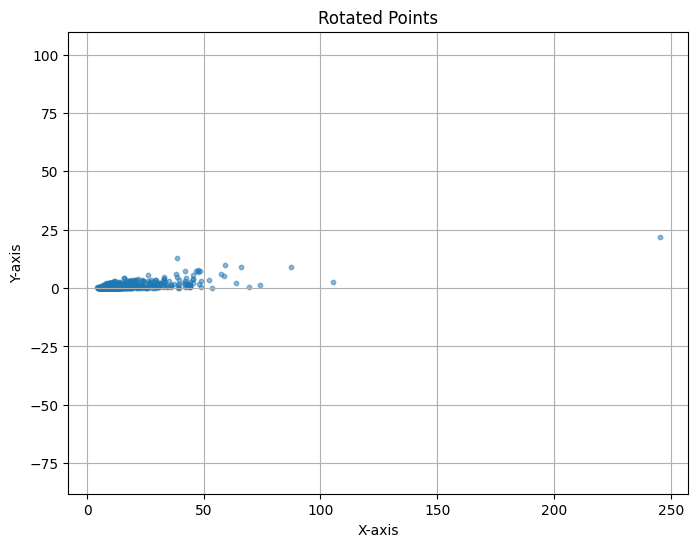

In [80]:
#rotate the points by 45 degrees clockwise
def rotate_points(points, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians)],
                                 [np.sin(angle_radians), np.cos(angle_radians)]])
    return points @ rotation_matrix.T
rotated_points = rotate_points(coords, -45)  # Rotate by -45 degrees


# Plot the rotated points
plt.figure(figsize=(8, 6))
plt.scatter(rotated_points[:, 0], rotated_points[:, 1], s=10, alpha=0.5)
plt.title('Rotated Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.axis('equal')
plt.show()

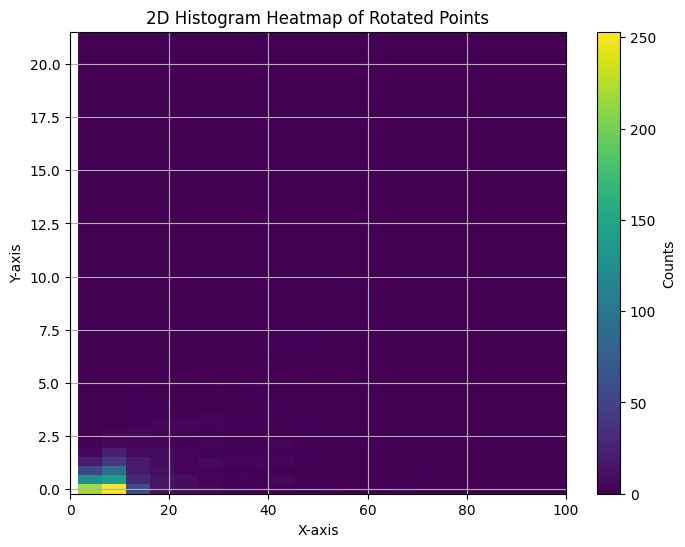

In [81]:
# convert to discrete heat map
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D histogram (heatmap) of the rotated points
heatmap, xedges, yedges = np.histogram2d(rotated_points[:, 0], rotated_points[:, 1], bins=50)
# Create a meshgrid for the heatmap
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, heatmap.T, shading='auto', cmap='viridis')
plt.colorbar(label='Counts')
plt.title('2D Histogram Heatmap of Rotated Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# set yaxis to 0 - 30
# plt.gca().set_ylim(bottom=0, top=30)
# set xaxis to 0 - 100
plt.gca().set_xlim(left=0, right=100)
plt.grid()
plt.show()

In [82]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import kmapper as km

# Step 1: Generate synthetic X10-like gene expression data
# Simulate 3 clusters of cells in 50-dimensional gene space
test = top_variance_genes_df.reset_index(drop=True)
X = StandardScaler().fit_transform(test.values)

# Convert to DataFrame (simulate genes as columns)
gene_names = [f"Gene_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=gene_names)

# Step 2: Initialize KeplerMapper
mapper = km.KeplerMapper(verbose=1)

# Step 3: Use PCA as lens
lens = mapper.fit_transform(df, projection=PCA(n_components=2))

# Step 4: Create a Mapper graph
graph = mapper.map(
    lens,
    df.values,
    clusterer=DBSCAN(eps=5.0, min_samples=3),
    cover=km.Cover(n_cubes=50, perc_overlap=0.5)
)

# Step 5: Visualize (save HTML)
html_path = "mapper_x10_synthetic_norm.html"
mapper.visualize(
    graph,
    path_html=html_path,
    title="Mapper on Synthetic X10 Genomic Data"
)

html_path  # Return path to HTML file


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=2)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (2543, 100)

..Projecting data using: 
	PCA(n_components=2)


..Scaling with: MinMaxScaler()

Mapping on data shaped (2543, 100) using lens shaped (2543, 2)

Creating 2500 hypercubes.

Created 307 edges and 105 nodes in 0:00:08.610011.
Wrote visualization to: mapper_x10_synthetic_norm.html


'mapper_x10_synthetic_norm.html'